In [21]:
#Import Os and Basis Libraries
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Matplot Images
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#Kernel Intilizer
from tensorflow.keras.initializers import he_normal
# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers
#PreTrained Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import Xception
#Image Generator DataAugmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing import image
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove
import warnings
warnings.filterwarnings("ignore")
#Splitting Data
# import splitfolders
from keras.regularizers import l2

In [22]:
# Directory containing the "Train" folder
directory = "/kaggle/input/img-dataset/Images"

# Initialize empty lists for file paths and labels
filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)


In [23]:
# Head
df_train

,filepath,label
0,/kaggle/input/img-dataset/Images/n02091635-ott...,n02091635-otterhound
1,/kaggle/input/img-dataset/Images/n02091635-ott...,n02091635-otterhound
2,/kaggle/input/img-dataset/Images/n02091635-ott...,n02091635-otterhound
3,/kaggle/input/img-dataset/Images/n02091635-ott...,n02091635-otterhound
4,/kaggle/input/img-dataset/Images/n02091635-ott...,n02091635-otterhound
...,...,...
20575,/kaggle/input/img-dataset/Images/n02088466-blo...,n02088466-bloodhound
20576,/kaggle/input/img-dataset/Images/n02088466-blo...,n02088466-bloodhound
20577,/kaggle/input/img-dataset/Images/n02088466-blo...,n02088466-bloodhound
20578,/kaggle/input/img-dataset/Images/n02088466-blo...,n02088466-bloodhound


In [24]:
from sklearn.model_selection import train_test_split

train_df, dummy_df = train_test_split(df_train, train_size=0.8, shuffle=True, random_state=42)
valid_df, test_df = train_test_split(dummy_df, test_size=0.5, shuffle=True, random_state=42)


In [25]:
# Shape
print(f"The shape of The Train data is: {train_df.shape}")
print(f"The shape of The Validation data is: {valid_df.shape}")
print(f"The shape of The Test data is: {test_df.shape}")

The shape of The Train data is: (16464, 2)
The shape of The Validation data is: (2058, 2)
The shape of The Test data is: (2058, 2)


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Your existing code here
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
# Check shapes of one batch
# images, labels = next(train_df)
# print("Image batch shape:", images.shape)  # Should be (batch_size, 224, 224, 3)
# print("Label batch shape:", labels.shape)  # Should match your number of classes (batch_size, 5)


In [28]:
# Create ImageDataGenerator instances for  Train , validation and test sets (only rescale pixel values)
#train_datagen = ImageDataGenerator(rescale=1./255,)
#validation_datagen = ImageDataGenerator(rescale=1./255)
#test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Flow images from dataframes and apply augmentation (if any)
print("Training Data")
train_ds = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

print("Validation Data")
validation_ds = validation_datagen.flow_from_dataframe(
    valid_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
print("Test Data")
test_ds = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)


Training Data
Found 16464 validated image filenames belonging to 120 classes.
Validation Data
Found 2058 validated image filenames belonging to 120 classes.
Test Data
Found 2058 validated image filenames belonging to 120 classes.


In [ ]:
# Count the occurrences of each category in the 'category' column
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [30]:
def visualize_images(path, num_images=5):
    # Get a list of image filenames in the specified path
    image_filenames = os.listdir(path)

    # Limit the number of images to visualize if there are more than num_images
    num_images = min(num_images, len(image_filenames))

    # Create a figure and axis object to display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='white')

    # Iterate over the selected images and display them
    for i, image_filename in enumerate(image_filenames[:num_images]):
        # Load the image using Matplotlib
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)

        # Display the image
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()


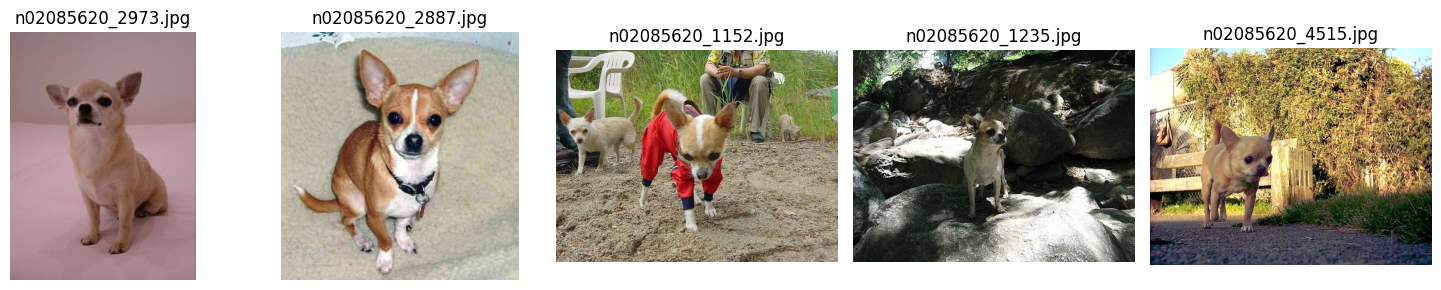

In [32]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/img-dataset/Images/n02085620-Chihuahua"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)


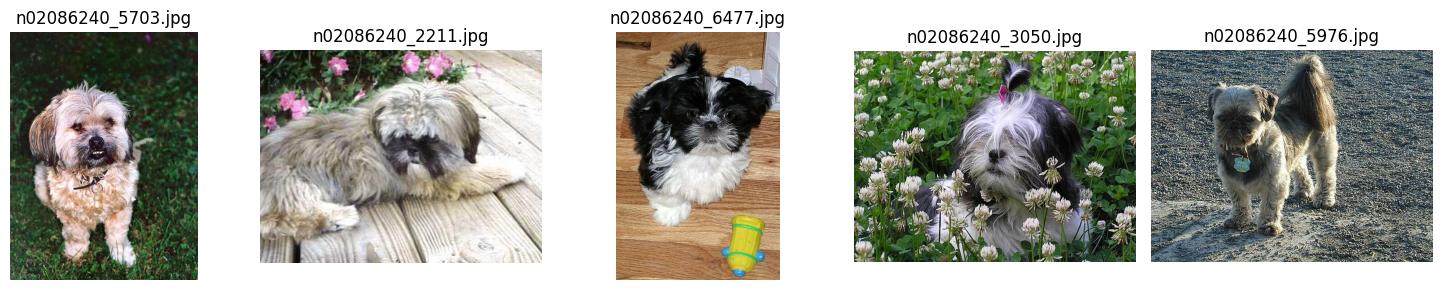

In [34]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/img-dataset/Images/n02086240-Shih-Tzu"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)


In [35]:
# Get the class indices assigned by the generators
class_indices_train = train_ds.class_indices

# Print the class indices
print("Class indices for Training Data:", class_indices_train)


Class indices for Training Data: {'n02085620-Chihuahua': 0, 'n02085782-Japanese_spaniel': 1, 'n02085936-Maltese_dog': 2, 'n02086079-Pekinese': 3, 'n02086240-Shih-Tzu': 4, 'n02086646-Blenheim_spaniel': 5, 'n02086910-papillon': 6, 'n02087046-toy_terrier': 7, 'n02087394-Rhodesian_ridgeback': 8, 'n02088094-Afghan_hound': 9, 'n02088238-basset': 10, 'n02088364-beagle': 11, 'n02088466-bloodhound': 12, 'n02088632-bluetick': 13, 'n02089078-black-and-tan_coonhound': 14, 'n02089867-Walker_hound': 15, 'n02089973-English_foxhound': 16, 'n02090379-redbone': 17, 'n02090622-borzoi': 18, 'n02090721-Irish_wolfhound': 19, 'n02091032-Italian_greyhound': 20, 'n02091134-whippet': 21, 'n02091244-Ibizan_hound': 22, 'n02091467-Norwegian_elkhound': 23, 'n02091635-otterhound': 24, 'n02091831-Saluki': 25, 'n02092002-Scottish_deerhound': 26, 'n02092339-Weimaraner': 27, 'n02093256-Staffordshire_bullterrier': 28, 'n02093428-American_Staffordshire_terrier': 29, 'n02093647-Bedlington_terrier': 30, 'n02093754-Border_te

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import Model
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Define input layer
input_tensor = Input(shape=(224, 224, 3))

# Load the DenseNet121 base model without the top (classification) layer
base_model = DenseNet121(weights='imagenet', include_top=False, pooling='max', input_tensor=input_tensor)

# Freeze the layers in the base model (optional to unfreeze later for fine-tuning)
base_model.trainable = False

# Build the model on top of DenseNet121
x = base_model.output

# Add Batch Normalization
x = BatchNormalization()(x)

# Add Dense Layer 1 with L2 regularization
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)

# Add Batch Normalization
x = BatchNormalization()(x)

# Add Dropout Layer to reduce overfitting
x = Dropout(0.5)(x)

# Add Output Layer for 120 classes (Softmax for multiclass classification)
output = Dense(120, activation='softmax')(x)

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with the Adamax optimizer and categorical cross-entropy loss for multiclass classification
model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary to check the architecture
model.summary()

# Data augmentation to enhance training data variability
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,335,864 (27.98 MB)

 Trainable params: 295,800 (1.13 MB)

 Non-trainable params: 7,040,064 (26.86 MB)

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',     # Monitor the validation loss
    patience=2,             # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

# Fitting the Model
history = model.fit(
    train_ds,                # The training dataset
    epochs=10,               # Number of epochs
    validation_data=validation_ds,  # The validation dataset
    callbacks=[early_stopping]  # List of callbacks to apply during training
)


Epoch 1/10


I0000 00:00:1729570386.002959     122 service.cc:145] XLA service 0x7a6ab8004d60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729570386.003007     122 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/515 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.0000e+00 - loss: 9.9854   

I0000 00:00:1729570399.973867     122 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.1554 - loss: 7.1958

I0000 00:00:1729570517.175982     124 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_12', 8 bytes spill stores, 8 bytes spill loads



515/515 ━━━━━━━━━━━━━━━━━━━━ 146s 229ms/step - accuracy: 0.1559 - loss: 7.1904 - val_accuracy: 0.6137 - val_loss: 3.6035
Epoch 2/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 51s 97ms/step - accuracy: 0.5290 - loss: 3.6169 - val_accuracy: 0.7089 - val_loss: 2.5033
Epoch 3/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 51s 97ms/step - accuracy: 0.6435 - loss: 2.5745 - val_accuracy: 0.7298 - val_loss: 2.0046
Epoch 4/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 48s 93ms/step - accuracy: 0.7039 - loss: 2.0003 - val_accuracy: 0.7425 - val_loss: 1.6873
Epoch 5/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 48s 91ms/step - accuracy: 0.7319 - loss: 1.6613 - val_accuracy: 0.7570 - val_loss: 1.5142
Epoch 6/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 48s 92ms/step - accuracy: 0.7669 - loss: 1.4073 - val_accuracy: 0.7468 - val_loss: 1.4002
Epoch 7/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 49s 93ms/step - accuracy: 0.7904 - loss: 1.2486 - val_accuracy: 0.7517 - val_loss: 1.3264
Epoch 8/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 49s 94ms/step - accuracy: 0.7985 - loss: 1.1398 - val_accur

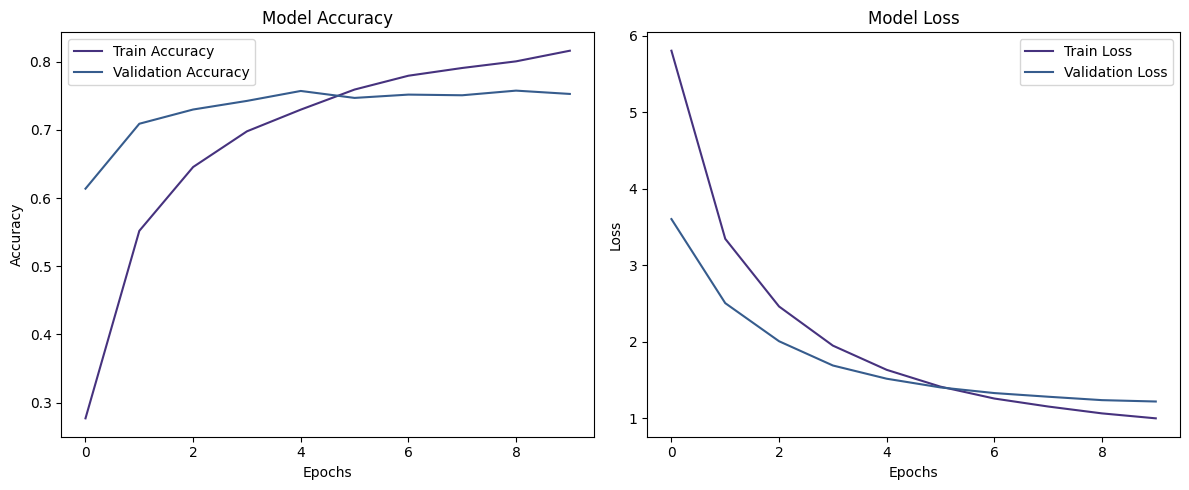

In [38]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [40]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def predict_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    return predicted_class

# Example usage
img_path = '/kaggle/input/img-dataset/Images/n02099712-Labrador_retriever/n02099712_1150.jpg'  # Replace with your image path
predicted_class_index = predict_image(model, img_path)

# Get class labels
class_labels = list(test_ds.class_indices.keys())

print(f'Predicted Class Index: {predicted_class_index}')
print(f'Predicted Class Label: {class_labels[predicted_class_index]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Predicted Class Index: 57
Predicted Class Label: n02099712-Labrador_retriever


In [41]:
model.save("dog_classification.h5")

In [42]:
os.listdir("/kaggle/input/img-dataset/Images")

['n02091635-otterhound',
 'n02102318-cocker_spaniel',
 'n02101388-Brittany_spaniel',
 'n02088094-Afghan_hound',
 'n02085936-Maltese_dog',
 'n02104365-schipperke',
 'n02100877-Irish_setter',
 'n02086079-Pekinese',
 'n02099601-golden_retriever',
 'n02100583-vizsla',
 'n02102177-Welsh_springer_spaniel',
 'n02093256-Staffordshire_bullterrier',
 'n02106166-Border_collie',
 'n02093991-Irish_terrier',
 'n02109961-Eskimo_dog',
 'n02110958-pug',
 'n02105412-kelpie',
 'n02094433-Yorkshire_terrier',
 'n02097474-Tibetan_terrier',
 'n02089867-Walker_hound',
 'n02110627-affenpinscher',
 'n02113186-Cardigan',
 'n02102040-English_springer',
 'n02089973-English_foxhound',
 'n02098286-West_Highland_white_terrier',
 'n02095570-Lakeland_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02101006-Gordon_setter',
 'n02098413-Lhasa',
 'n02099429-curly-coated_retriever',
 'n02088364-beagle',
 'n02108551-Tibetan_mastiff',
 'n02102480-Sussex_spaniel',
 'n02109525-Saint_Bernard',
 'n02087046-toy_terrier',
 'n0211379